# This jupyter notebook contains a basic example of
- how to cluster and (potentially) select REX structure ensembles from a contact-guided REX simulation

Note: you should be already familiar with:
- concept of dimension reduction (here TSNE)
- concept of clustering (here KMeans)

In [1]:
%matplotlib notebook

import pyrexMD.misc as misc
import pyrexMD.analysis.cluster as clu

# general steps
1) pre-filter REX trajectory based on task-specific criteria (e.g. QBias, QNative, Energies...)
<br>2) calculate distance matrices for filtered frames
<br>3) cluster filtered frames

In this example we start at step 3) and use unpublished sample data

In [2]:
# load data
QBias = misc.pickle_load("./files/cluster/QBias.pickle")
RMSD = misc.pickle_load("./files/cluster/RMSD.pickle")
GDT_TS = misc.pickle_load("./files/cluster/GDT_TS.pickle")

score_file = "./files/cluster/energies.log"
ENERGY = misc.read_file(score_file, usecols=1, skiprows=1)
DM = clu.read_h5("./files/cluster/DM.h5")

In [3]:
# apply TSNE for dimension reduction
tsne = clu.apply_TSNE(DM, n_components=2, perplexity=50, random_state=1)

### apply KMeans on TSNE-transformed data (two variants with low and high cluster number)
# note: here we set the high number only to 20 because our sample is small with only 500 frames

cluster10 = clu.apply_KMEANS(tsne, n_clusters=10, random_state=1)
cluster20 = clu.apply_KMEANS(tsne, n_clusters=20, random_state=1)

In [4]:
### map scores (energies) and accuracy (GDT, RMSD) to clusters
cluster10_scores = clu.map_cluster_scores(cluster_data=cluster10, score_file=score_file)
cluster10_accuracy = clu.map_cluster_accuracy(cluster_data=cluster10, GDT=GDT_TS, RMSD=RMSD)

cluster20_scores = clu.map_cluster_scores(cluster_data=cluster20, score_file=score_file)
cluster20_accuracy = clu.map_cluster_accuracy(cluster_data=cluster20, GDT=GDT_TS, RMSD=RMSD)

<IPython.core.display.Javascript object>


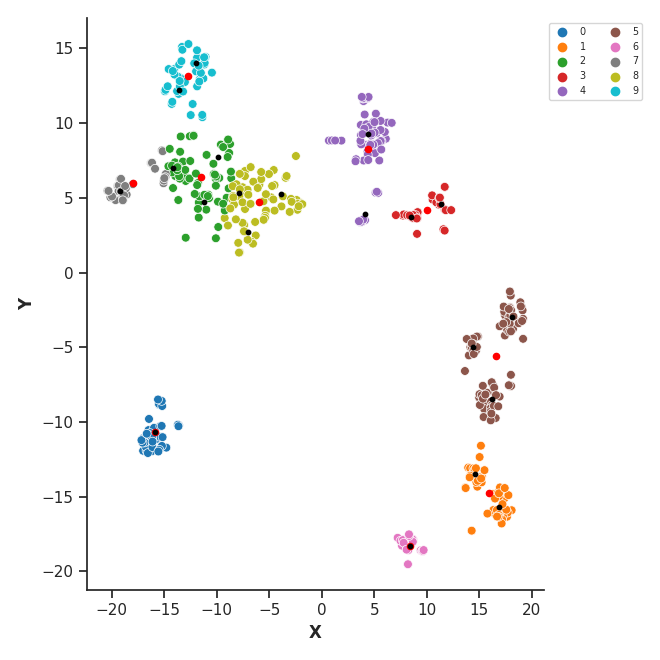

In [5]:
### plot cluster data
# here: TSNE-transformed data with n_clusters = 10
# also: plot cluster centers with different colors 
#     - red dot: n10 centers
#     - black dot: n20 centers

clu.plot_cluster_data(cluster10, tsne, ms=40)
clu.plot_cluster_centers(cluster10, marker="o", color="red", ms=20)
clu.plot_cluster_centers(cluster20, marker="o", color="black")

<IPython.core.display.Javascript object>


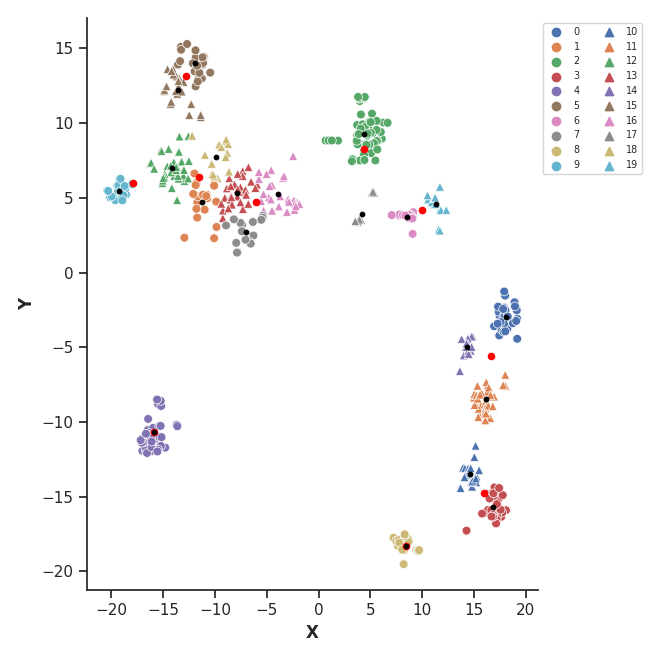

In [6]:
### plot cluster data
# here: TSNE-transformed data with n_clusters = 20
# also: plot cluster centers with different colors 
#     - red dot: n10 centers
#     - black dot: n20 centers

clu.plot_cluster_data(cluster20, tsne)
clu.plot_cluster_centers(cluster10, marker="o", color="red", ms=20)
clu.plot_cluster_centers(cluster20, marker="o", color="black")

In [7]:
### print table with cluster scores stats

clu.WF_print_cluster_scores(cluster_data=cluster10, cluster_scores=cluster10_scores)
print("-------------------------------------------------------------------")
clu.WF_print_cluster_scores(cluster_data=cluster20, cluster_scores=cluster20_scores)

cluster n10 scores (ranked by Emean)

ndx  size  compact | Emean    Estd    Emin      Emax      DELTA
  8   69     6.141 |-230.438  7.048  -246.249  -211.738  -7.456
  2   62     6.076 |-227.525  7.874  -242.131  -209.142  -4.543
  4   64      6.92 |-226.558  9.827  -249.136  -201.079  -3.576
  9   43     3.098 |-225.174  7.679  -242.951  -206.42   -2.192
  1   53     3.441 |-223.03   6.056  -237.002  -209.372  -0.048
  7   32     4.423 |-220.755  7.771  -237.887  -203.796   2.227 
  3   29     2.904 |-218.603  16.489  -246.674  -190.634   4.379 
  5   80     9.121 |-216.962  7.09   -235.155  -200.969   6.02  
  6   25     0.798 |-214.371  6.688  -228.33   -201.657   8.611 
  0   43      1.91 |-194.022  2.585  -198.461  -190.412   28.96 
-------------------------------------------------------------------
cluster n20 scores (ranked by Emean)

ndx  size  compact | Emean    Estd    Emin      Emax      DELTA
 17   12     1.115 |-236.354  12.82  -249.136  -201.079  -13.372
 16   27     2.60

In [8]:
### print table with cluster accuracy stats

clu.WF_print_cluster_accuracy(cluster_data=cluster10, cluster_accuracy=cluster10_accuracy)
print("---------------------------------------------------------------------------------")
clu.WF_print_cluster_accuracy(cluster_data=cluster20, cluster_accuracy=cluster20_accuracy)

cluster n10 accuracy (ranked by GDT mean)

                   | GDT     GDT    GDT     GDT    | RMSD   RMSD   RMSD   RMSD
ndx  size  compact | mean    std    min     max    | mean   std    min    max
  4    64     6.92 | 78.373  2.883  73.81   85.418 | 2.566  0.166  2.09   3.076
  8    69    6.141 | 76.985  2.424  63.69   82.44  | 2.807  0.097  2.62   3.154
  2    62    6.076 | 76.345  2.387  71.728  82.142 | 2.833  0.095  2.567  3.03 
  9    43    3.098 | 74.821  2.017  70.538  79.763 | 2.895  0.096  2.696  3.19 
  7    32    4.423 | 69.997  2.868  65.177  74.703 | 3.053  0.124  2.773  3.221
  3    29    2.904 | 69.376  15.771 41.37   94.94  | 2.979  1.398  0.996  6.501
  5    80    9.121 | 64.695  3.943  55.057  74.703 | 3.444  0.238  2.719  3.896
  1    53    3.441 | 63.235  1.766  58.927  66.668 | 3.498  0.132  3.079  3.721
  6    25    0.798 | 60.012  2.289  56.248  63.69  | 3.804  0.087  3.684  4.043
  0    43     1.91 | 55.621  2.013  51.785  60.715 | 4.312  0.17   3.794  4.798


Note: based on initial filtering and setup of energy function it is possible to "guess" good structure ensembles and verify selections based on accuracy stats